In [1]:
import ipympl
%matplotlib widget
%matplotlib inline
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from sympy import *
import pandas as pd
from causalgraphicalmodels import CausalGraphicalModel
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

# Modelo de Oferta y Demanda Agregada

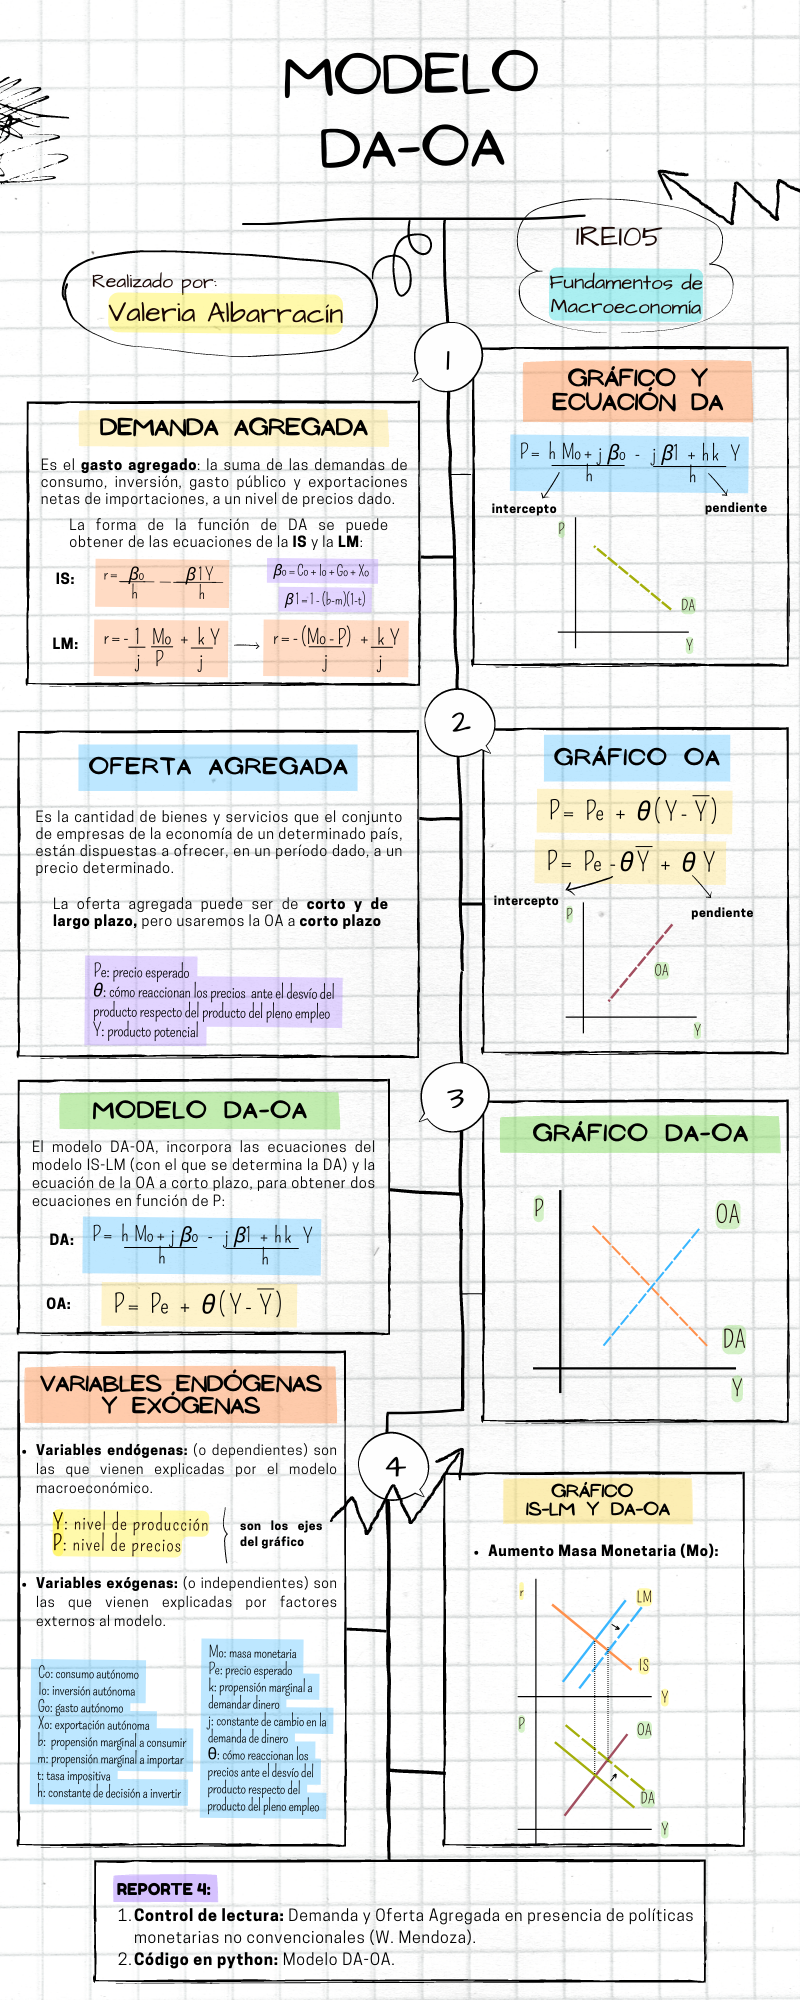

In [2]:
Image('tutorial6.png')

## Demanda Agregada $(DA)$:

Matemáticamente, la forma de la función de demanda agregada se puede obtener de las ecuaciones de la IS y la LM, eliminando “r” y despejando P. Para efectuar esta operación se supondrá que P no está dado.

Considernado, por un lado, la Curva IS:

$$ r = \frac{B_o}{h} - \frac{B_1}{h}Y $$

Donde $ B_0 = C_o + I_o + G_o + X_o $ y $ B_1 = 1 - (b - m)(1 - t)$

Y, por otro, la ecuación de la LM

$$  r = -\frac{1}{j}\frac{Mo^s}{P} + \frac{k}{j}Y $$

Eliminando “r” y despejando P, se obtiene:

$$  P = -\frac{h Mo^s}{-j B_o + (jB_1 + hk)Y} $$

O, en función del nivel de ingresos $(Y)$:

$$  Y = \frac{jB_o}{jB_1 + hk} + (\frac{hMo^s}{jB_1 + hk})\frac{1}{P} $$


Ahora bien, considernado la **nueva ecuación** de equilibrio en el mercado monetario donde hacemos el reemplazo de 

$$ \frac{Mo^s}{P} ----> Mo^s - P $$


$$ Mo^s - P = kY - jr $$

Se reemplaza $(r)$, y se obtiene la ecuación de la demanda agregada $(DA)$, que ahora es una recta y no una hipérbola

$$  P = \frac{h Mo^s + jB_o}{h} - \frac{jB_1 + hk}{h}Y $$


In [3]:
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

k = 2
j = 1                
Ms = 200             
P  = 20  

Y = np.arange(Y_size)


# Ecuación
B0 = Co + Io + Go + Xo
B1 = 1 - (b-m)*(1-t)

# Funcion de la demanda agregaga P(Y)
def P_AD(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_AD = P_AD(h, Ms, j, B0, B1, k, Y)

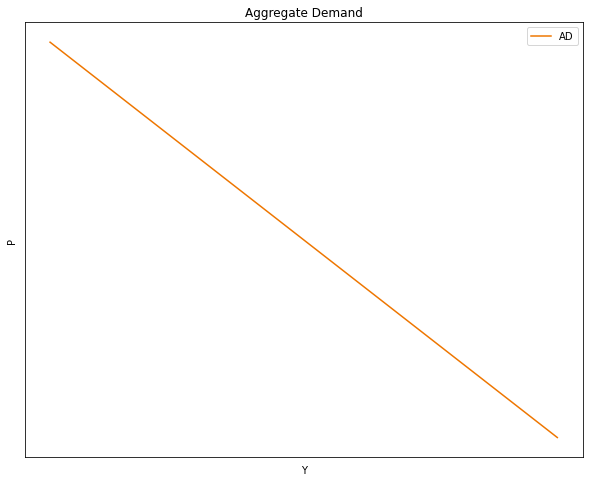

In [4]:
y_max = np.max(P_AD)

fig, ax = plt.subplots(figsize=(10, 8))
ax.set(title="Aggregate Demand", xlabel= r'Y', ylabel= r'P')
ax.plot(Y, P_AD, "#EE7600", label = "AD")  

ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

ax.legend()
plt.show()

In [5]:
# Primero declarar los simbolos
h, Ms, j, B0, B1, k, Y = symbols('h, Ms, j, B0, B1, k, Y')

# Ecuacion de la curva DA 
r_eq_DA = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)

# tomar diferenciales
df_r_eq_DA_Y = diff(r_eq_DA, Y)

print("La pendiente de la curva DA es", df_r_eq_DA_Y)  

La pendiente de la curva DA es -(B1*j + h*k)/h


In [6]:
#--------------------------------------------------
    # Curva IS

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#--------------------------------------------------
    # Curva LM 

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

# Dos curvas adicionales

Ms = 800
def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_Ms1 = i_LM( k, j, Ms, P, Y)

Ms = 1400
def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_Ms2 = i_LM( k, j, Ms, P, Y)

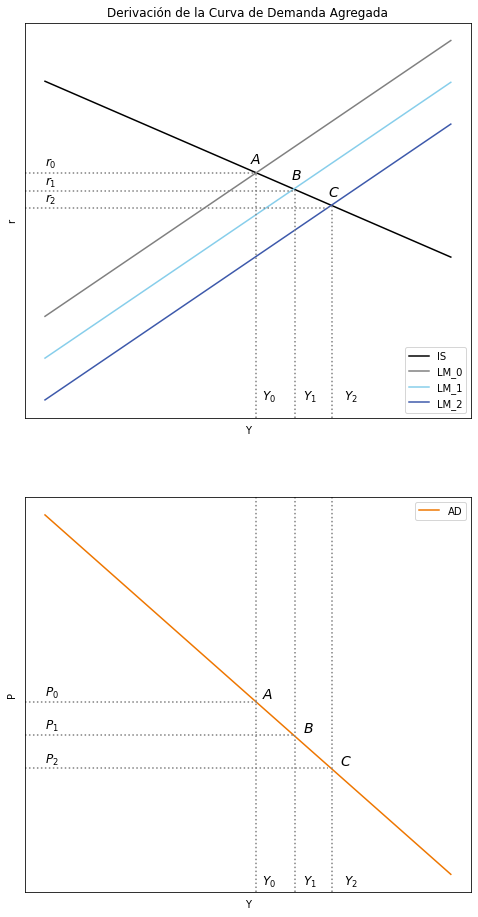

In [7]:
# Setemos caracteristicas de figura
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 16)) 

# Ploteamos las 4 rectas
ax1.set(title="Derivación de la Curva de Demanda Agregada", xlabel= r'Y', ylabel= r'r')
ax1.plot(Y, r, label = "IS", color = "black") #IS
ax1.plot(Y, i, label="LM_0", color = "grey")  #LM_0
ax1.plot(Y, i_Ms1, label="LM_1", color = "skyblue")  #LM_1
ax1.plot(Y, i_Ms2, label="LM_2", color = "#3D59AB")  #LM_2

# Quitamos los "numeros" de las rectas 
ax1.yaxis.set_major_locator(plt.NullLocator())   
ax1.xaxis.set_major_locator(plt.NullLocator())

# Agregamos las lineas punteadas - I
ax1.axvline(x=51.5,  ymin= 0, ymax= 0.62, linestyle = ":", color = "grey")
ax1.axvline(x=61,  ymin= 0, ymax= 0.58, linestyle = ":", color = "grey")
ax1.axvline(x=70,  ymin= 0, ymax= 0.54, linestyle = ":", color = "grey")

# Agregamos las lineas punteadas - II
ax1.axhline(y=93, xmin= 0, xmax= 0.52, linestyle = ":", color = "grey")
ax1.axhline(y=80, xmin= 0, xmax= 0.6, linestyle = ":", color = "grey")
ax1.axhline(y=68, xmin= 0, xmax= 0.68, linestyle = ":", color = "grey")

# Agregamos los labels de los puntos de equilibrio
ax1.text(50,100, '$A$', fontsize = 14, color = 'black')
ax1.text(60,88, '$B$', fontsize = 14, color = 'black')
ax1.text(69,76, '$C$', fontsize = 14, color = 'black')

# Agregamos los labels de los puntos de equilibrio - r 
ax1.text(0,98, '$r_0$', fontsize = 12, color = 'black')
ax1.text(0,84, '$r_1$', fontsize = 12, color = 'black')
ax1.text(0,72, '$r_2$', fontsize = 12, color = 'black')

# Agregamos los labels de los puntos de equilibrio - Y
ax1.text(53,-70, '$Y_0$', fontsize = 12, color = 'black')
ax1.text(63,-70, '$Y_1$', fontsize = 12, color = 'black')
ax1.text(73,-70, '$Y_2$', fontsize = 12, color = 'black')

ax1.legend()

#------

ax2.set( xlabel= r'Y', ylabel= r'P')

ax2.plot(Y, P_AD, "#EE7600", label = "AD")  

ax2.yaxis.set_major_locator(plt.NullLocator())   
ax2.xaxis.set_major_locator(plt.NullLocator())

ax2.axvline(x=51.5,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax2.axvline(x=61,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax2.axvline(x=70,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")

ax2.axhline(y=190, xmin= 0, xmax= 0.52, linestyle = ":", color = "grey")
ax2.axhline(y=160, xmin= 0, xmax= 0.6, linestyle = ":", color = "grey")
ax2.axhline(y=130, xmin= 0, xmax= 0.68, linestyle = ":", color = "grey")

ax2.text(53,193, '$A$', fontsize = 14, color = 'black')
ax2.text(63,163, '$B$', fontsize = 14, color = 'black')
ax2.text(72,133, '$C$', fontsize = 14, color = 'black')

ax2.text(0,195, '$P_0$', fontsize = 12, color = 'black')
ax2.text(0,165, '$P_1$', fontsize = 12, color = 'black')
ax2.text(0,135, '$P_2$', fontsize = 12, color = 'black')

ax2.text(53,25, '$Y_0$', fontsize = 12, color = 'black')
ax2.text(63,25, '$Y_1$', fontsize = 12, color = 'black')
ax2.text(73,25, '$Y_2$', fontsize = 12, color = 'black')

ax2.legend()

plt.show()


## Oferta Agregada $(OA)$

### Oferta Agregada en el corto plazo

El corto plazo es un periodo en el cual el producto $(Y)$ se ubica por debajo o por encima de su nivel de largo plazo o Producto Potencial $(\bar{Y})$.

Entonces, curva de $OA$ de corto plazo se puede representar con la siguiente ecuación:

$$ P = P^e + θ(Y - \bar{Y}) $$ 

- Donde $(P)$ is the nivel de precios, $(P^e)$ el precio esperado y $\bar{Y}$ el producto potencial.

In [8]:
# Parámetros
Y_size = 100

Pe = 150   #precio esperado
θ = 10
_Y = 62   #producto potencial

Y = np.arange(Y_size)


# Función de curva de oferta
def P_AS(Pe, _Y, Y, θ):
    P_AS = Pe + θ*(Y-_Y)
    return P_AS

P_AS = P_AS(Pe, _Y, Y, θ)

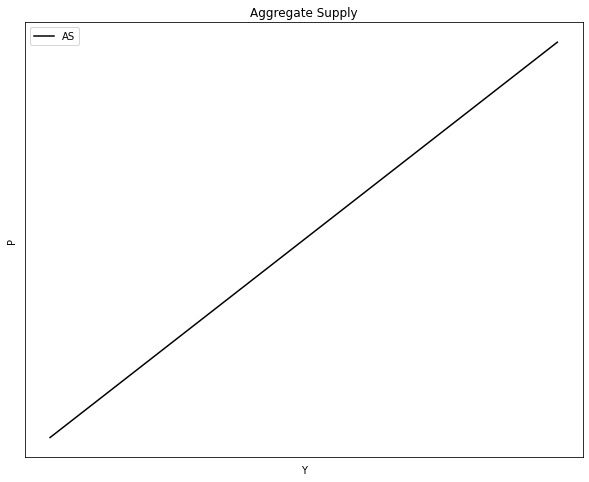

In [9]:
y_max = np.max(P_AS)

fig, ax = plt.subplots(figsize=(10, 8))
ax.set(title="Aggregate Supply", xlabel= r'Y', ylabel= r'P')
ax.plot(Y, P_AS, "k-", label = "AS")  
ax.legend()

ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

plt.show()

In [10]:
# Primero declarar los simbolos
Pe, _Y, Y, θ = symbols('Pe, _Y, Y, θ')

# Ecuacion de la curva DA 
r_eq_OA = Pe + θ*(Y-_Y)

# tomar diferenciales
df_r_eq_OA_Y = diff(r_eq_OA, Y)

print("La pendiente de la curva OA es", df_r_eq_OA_Y)  

La pendiente de la curva OA es θ


## Equilibrio entre la Demanda Agregada y la Oferta Agregada: Modelo DA-OA

In [11]:
#1--------------------------
    # Demanda Agregada
    
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

k = 2
j = 1                
Ms = 200             
P  = 8  

Y = np.arange(Y_size)


# Ecuación

B0 = Co + Io + Go + Xo
B1 = 1 - (b-m)*(1-t)

def P_AD(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_AD = P_AD(h, Ms, j, B0, B1, k, Y)


#2--------------------------
    # Oferta Agregada
    
# Parámetros

Y_size = 100

Pe = 100 
θ = 3
_Y = 20   

Y = np.arange(Y_size)


# Ecuación

def P_AS(Pe, _Y, Y, θ):
    P_AS = Pe + θ*(Y-_Y)
    return P_AS

P_AS = P_AS(Pe, _Y, Y, θ)

In [12]:
# líneas punteadas autómaticas

# definir la función line_intersection
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

    # coordenadas de las curvas (x,y)
A = [P_AD[0], Y[0]] # DA, coordenada inicio
B = [P_AD[-1], Y[-1]] # DA, coordenada fin

C = [P_AS[0], Y[0]] # L_45, coordenada inicio
D = [P_AS[-1], Y[-1]] # L_45, coordenada fin

    # creación de intersección

intersec = line_intersection((A, B), (C, D))
intersec # (y,x)

(192.39043824701196, 50.79681274900399)

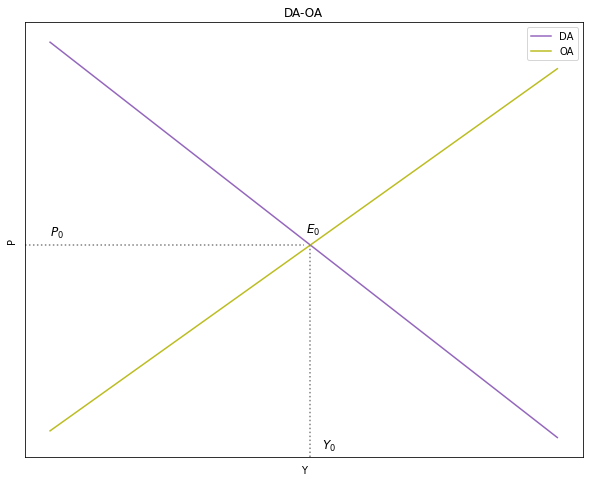

In [13]:
    # Gráfico del modelo DA-OA

# Dimensiones del gráfico
y_max = np.max(P)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar 
ax.plot(Y, P_AD, label = "DA", color = "C4") #DA
ax.plot(Y, P_AS, label = "OA", color = "C8") #OA

# Líneas punteadas
plt.axhline(y=intersec[0], xmin= 0, xmax= 0.5, linestyle = ":", color = "grey")
plt.axvline(x=intersec[1],  ymin= 0, ymax= 0.49, linestyle = ":", color = "grey")

# Texto agregado
plt.text(0, 200, '$P_0$', fontsize = 12, color = 'black')
plt.text(53, 25, '$Y_0$', fontsize = 12, color = 'black')
plt.text(50, 202, '$E_0$', fontsize = 12, color = 'black')


# Eliminar valores de ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Título, ejes y leyenda
ax.set(title="DA-OA", xlabel= r'Y', ylabel= r'P')
ax.legend()

plt.show()

## Ecuaciones de equilibrio DA-OA

Tienen que recordar que en el modelo DA-OA tenemos tres variables endógenas. $$Y^{eq}, r^{eq} , P^{eq}$$

Considerando la ecuación de la demanda agregada $(DA)$:

$$  P = \frac{h Mo^s + jB_o}{h} - \frac{jB_1 + hk}{h}Y \ ...(1)$$ 

Y la ecuación de la oferta agregada $(OA)$:

$$ P = P^e + θ(Y - \bar{Y}) \ ...(2)$$ 

- Para hallar $Y^{eq\_da\_oa}$ igualamos ecuaciones 1 y 2:

$$ \frac{h Mo^s + jB_o}{h} - \frac{jB_1 + hk}{h}Y = P^e + θ(Y - \bar{Y}) $$

$$ Y^{eq\_da\_oa} = [ \frac{1}{(θ + \frac{jB_1 + hk}{h})} ]*[(\frac{h Mo^s + jB_o}{h} - P^e + θ\bar{Y})]$$

- Para encontrar $P^{eq}$ solamente reemplazamos $Y^{eq}$ en la ecuación de oferta agregada

$$ P^{eq\_da\_oa} = P^e + θ( Y^{eq\_da\_oa} - \bar{Y} ) $$ 

$$ P^{eq\_da\_oa} = P^e + θ( [ \frac{1}{(θ + \frac{jB_1 + hk}{h})} ]*[(\frac{h Mo^s + jB_o}{h} - P^e + θ\bar{Y})] - \bar{Y} ) $$ 


<!-- - Para hallar P^e, despejamos la ecuación de $OA$ en función de Y:

$$ P = P^e + θ(Y - \bar{Y}) $$ 

$$ Y = \frac{P - P^e - θ\bar{Y}}{θ} $$

Y reemplazamos $Y$ en la ecuación de $DA$:

$$ P^e = (\frac{h Mo^s + jB_o}{h} - \frac{jB_1 + hk}{h}) * (\frac{P - P^e - θ\bar{Y}}{θ}) $$ -->

- Para encontrar $r^{eq\_da\_oa}$ solamente reemplazamos $P^{eq\_da\_oa}$ en la ecuación de tasa de interés de equilibrio del modelo IS-LM. 

- Tasa de interés de equilibrio:

$$ r^{eq\_is\_lm} = \frac{kB_o}{kh + jB_1} - (\frac{B_1}{kh + jB_1})*(Ms_o - P)$$

- Tasa de interés de equilibrio en DA-OA
$$ r^{eq\_is\_lm} = \frac{kB_o}{kh + jB_1} - (\frac{B_1}{kh + jB_1})*(Ms_o - P^{eq\_da\_oa})$$

$$ r^{eq\_da\_oa} = \frac{kB_o}{kh + jB_1} - (\frac{B_1}{kh + jB_1})*(Ms_o - P^e + θ( [ \frac{1}{(θ + \frac{jB_1 + hk}{h})} ]*[(\frac{h Mo^s + jB_o}{h} - P^e + θ\bar{Y})] - \bar{Y} ) ) $$


Los valores de equilibrio de las tres principales variables endógenas 

1. $$ Y^{eq\_da\_oa} = [ \frac{1}{(θ + \frac{jB_1 + hk}{h})} ]*[(\frac{h Mo^s + jB_o}{h} - P^e + θ\bar{Y})]$$

2. $$ r^{eq\_da\_oa} = \frac{kB_o}{kh + jB_1} - (\frac{B_1}{kh + jB_1})*(Ms_o - P^e + θ( [ \frac{1}{(θ + \frac{jB_1 + hk}{h})} ]*\\
[(\frac{h Mo^s + jB_o}{h} - P^e + θ\bar{Y})] - \bar{Y} ) ) $$

3. $$ P^{eq\_da\_oa} = P^e + θ( [ \frac{1}{(θ + \frac{jB_1 + hk}{h})} ]*[(\frac{h Mo^s + jB_o}{h} - P^e + θ\bar{Y})] - \bar{Y} ) $$ 


In [14]:
# nombrar variables como símbolos de IS
Co, Io, Go, Xo, h, r, b, m, t, beta_0, beta_1  = symbols('Co Io Go Xo h r b m t beta_0, beta_1')

# nombrar variables como símbolos de LM 
k, j, Ms, P, Y = symbols('k j Ms P Y')

# nombrar variables como símbolos para curva de oferta agregada
Pe, _Y, Y, θ = symbols('Pe, _Y, Y, θ')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio en el modelo DA-OA
Y_eq = ( (1)/(θ + ( (j*beta_1+h*k)/h) ) )*( ( (h*Ms+j*beta_0)/h ) - Pe + θ*_Y )

# Precio de equilibrio en el modelo DA-OA 
P_eq = Pe + θ*(Y_eq - _Y)

# Tasa de interés de equilibrio en el modelo DA-OA
r_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms - P_eq)
#((h*Ms+j*beta_0)/h) - ((j*beta_1+h*r)/h)*((P-Pe-θ*_Y)/θ)


## Estática comparativa DA-OA

### Incremento en el Precio Esperado $(P^e)$:

- Intuición:

Modelo DA-OA: 

$$ Pe↑ → P↑ $$

Modelo IS-LM: 
$$ P↑ → M^s↓ → M^s < M^d → r↑ $$
$$ r↑ → I↓ → DA↓ → DA < Y → Y↓ $$


- Matemática:

In [15]:
# Efecto del cambio en Precio esperado sobre el producto en el modelo DA-OA
df_Y_eq_Pe = diff(Y_eq, Pe)
print("El Diferencial del Producto con respecto al diferencial del precio esperado = ", df_Y_eq_Pe)

El Diferencial del Producto con respecto al diferencial del precio esperado =  -1/(θ + (h*k + j*(-(1 - t)*(b - m) + 1))/h)


In [16]:
# Efecto del cambio de Precio esperado sobre Tasa de Interés en el modelo DA-OA
df_r_eq_Pe = diff(r_eq, Pe)
print("El Diferencial del nivel de precios con respecto al diferencial del precio esperado = ", df_r_eq_Pe)

El Diferencial del nivel de precios con respecto al diferencial del precio esperado =  h*(θ/(θ + (h*k + j*(-(1 - t)*(b - m) + 1))/h) - 1)/(h*k + j*(-(1 - t)*(b - m) + 1))


In [17]:
# Efecto del cambio en Precio esperado sobre el nivel de Precios en el modelo DA-OA
df_P_eq_Pe = diff(P_eq, Pe)
print("El Diferencial del nivel de precios con respecto al diferencial del precio esperado = ", df_P_eq_Pe)

El Diferencial del nivel de precios con respecto al diferencial del precio esperado =  -θ/(θ + (h*k + j*(-(1 - t)*(b - m) + 1))/h) + 1


- Gráfico:

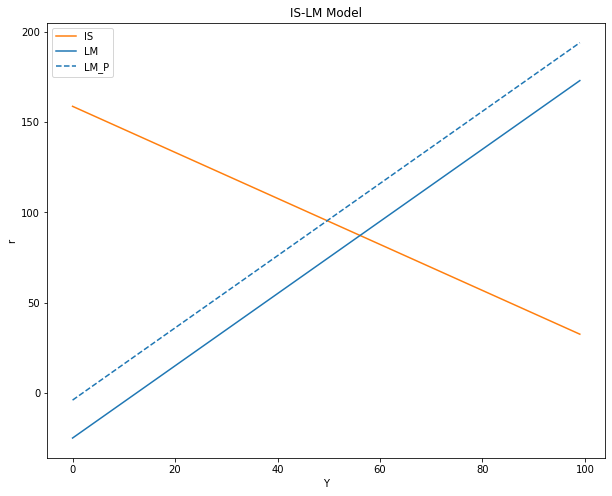

In [18]:
#1--------------------------------------------------
    # Curva IS ORIGINAL

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#2--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 8           

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

#--------------------------------------------------
    # NUEVA curva LM: incremento en la Masa Monetaria (Ms)

# Definir SOLO el parámetro cambiado
P = 50

# Generar la ecuación con el nuevo parámetro
def i_LM_P( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_P = i_LM_P( k, j, Ms, P, Y)

    # Gráfico del modelo IS-LM

# Dimensiones del gráfico
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r, label = "IS", color = "C1") #IS
ax.plot(Y, i, label="LM", color = "C0")  #LM
ax.plot(Y, i_P, label="LM_P", color = "C0", linestyle ='dashed')  #LM_P

# Título, ejes y leyenda
ax.set(title="IS-LM Model", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

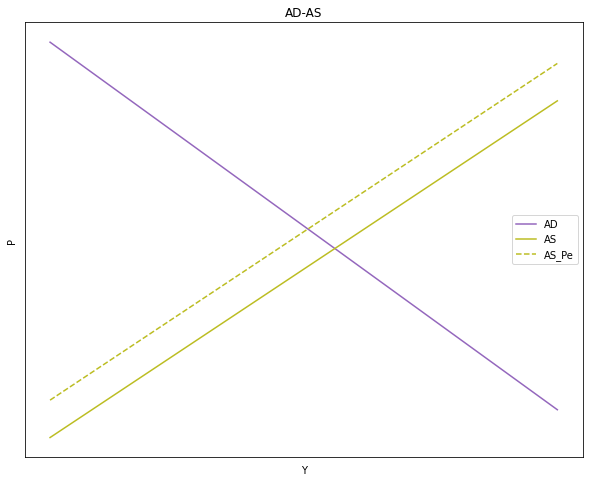

In [19]:
#1--------------------------
    # Demanda Agregada ORGINAL
    
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

k = 2
j = 1                
Ms = 200             
P  = 8  

Y = np.arange(Y_size)


# Ecuación

B0 = Co + Io + Go + Xo
B1 = 1 - (b-m)*(1-t)

def P_AD(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_AD = P_AD(h, Ms, j, B0, B1, k, Y)


#2--------------------------
    # Oferta Agregada ORIGINAL
    
# Parámetros

Y_size = 100

Pe = 70
θ = 3
_Y = 20  

Y = np.arange(Y_size)

# Ecuación

def P_AS(Pe, _Y, Y, θ):
    P_AS = Pe + θ*(Y-_Y)
    return P_AS

P_AS = P_AS(Pe, _Y, Y, θ)


#--------------------------------------------------
    # NUEVA Oferta Agregada

# Definir SOLO el parámetro cambiado

Pe = 103

# Generar la ecuación con el nuevo parámetro

def P_AS_Pe(Pe, _Y, Y, θ):
    P_AS = Pe + θ*(Y-_Y)
    return P_AS

P_Pe = P_AS_Pe(Pe, _Y, Y, θ)

    # Gráfico del modelo DA-OA

# Dimensiones del gráfico

y_max = np.max(P)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar 
ax.plot(Y, P_AD, label = "AD", color = "C4") #DA
ax.plot(Y, P_AS, label = "AS", color = "C8") #OA
ax.plot(Y, P_Pe, label = "AS_Pe", color = "C8", linestyle = 'dashed') #OA_Pe

# Eliminar valores de ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Título, ejes y leyenda
ax.set(title="AD-AS", xlabel= r'Y', ylabel= r'P')
ax.legend()

plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

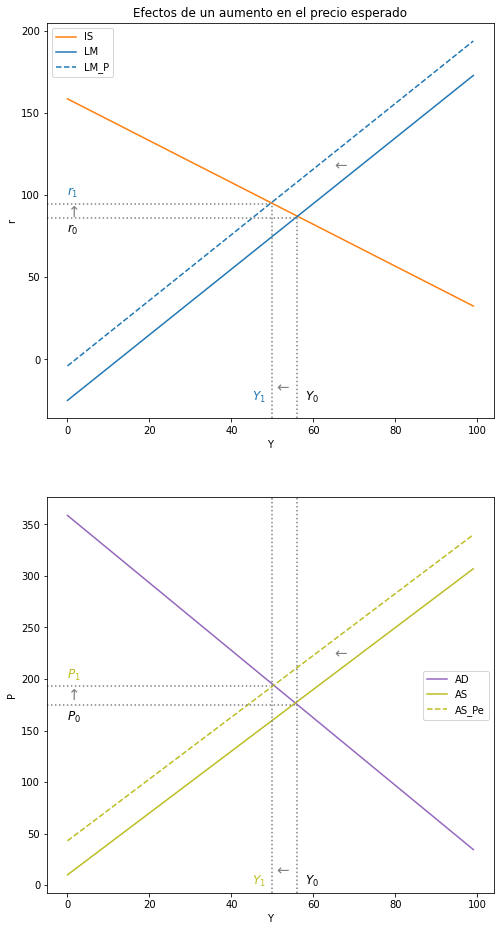

In [20]:
# Dos gráficos en un solo cuadro
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 16)) 

#---------------------------------
    # Gráfico 1: IS-LM
    
ax1.plot(Y, r, label = "IS", color = "C1") #IS
ax1.plot(Y, i, label="LM", color = "C0")  #LM
ax1.plot(Y, i_P, label="LM_P", color = "C0", linestyle ='dashed')  #LM

ax1.axvline(x=50,  ymin= 0, ymax= 0.55, linestyle = ":", color = "grey")
ax1.axvline(x=56,  ymin= 0, ymax= 0.51, linestyle = ":", color = "grey")
ax1.axhline(y=94.5,  xmin= 0, xmax= 0.5, linestyle = ":", color = "grey")
ax1.axhline(y=86,  xmin= 0, xmax= 0.56, linestyle = ":", color = "grey")

ax1.text(65, 115, '←', fontsize=15, color='grey')
ax1.text(51, -20, '←', fontsize=15, color='grey')
ax1.text(0, 87, '↑', fontsize=15, color='grey')
ax1.text(58, -25, '$Y_0$', fontsize=12, color='black')
ax1.text(45, -25, '$Y_1$', fontsize=12, color='C0')
ax1.text(0, 77, '$r_0$', fontsize=12, color='black')
ax1.text(0, 100, '$r_1$', fontsize=12, color='C0')


ax1.set(title="Efectos de un aumento en el precio esperado", xlabel= r'Y', ylabel= r'r')
ax1.legend()


#---------------------------------
    # Gráfico 2:

ax2.plot(Y, P_AD, label = "AD", color = "C4") #DA
ax2.plot(Y, P_AS, label = "AS", color = "C8") #OA
ax2.plot(Y, P_Pe, label = "AS_Pe", color = "C8", linestyle = 'dashed') #OA_Pe

ax2.axvline(x=50,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax2.axvline(x=56,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax2.axhline(y=193,  xmin= 0, xmax= 0.5, linestyle = ":", color = "grey")
ax2.axhline(y=175,  xmin= 0, xmax= 0.56, linestyle = ":", color = "grey")

ax2.text(51, 10, '←', fontsize=15, color='grey')
ax2.text(65, 220, '←', fontsize=15, color='grey')
ax2.text(0, 180, '↑', fontsize=15, color='grey')

ax2.text(58, 0, '$Y_0$', fontsize=12, color='black')
ax2.text(45, 0, '$Y_1$', fontsize=12, color='C8')
ax2.text(0, 160, '$P_0$', fontsize=12, color='black')
ax2.text(0, 200, '$P_1$', fontsize=12, color='C8')

ax2.set(xlabel= r'Y', ylabel= r'P')
ax2.legend()

plt.show


### Incremento en la Masa Monetaria $(M_o^s)$:

- Intuición:

Modelo IS-LM: 
$$ Ms↑ → M^s↑ → M^s > M^d → r↓ $$
$$ r↓ → I↑ → DA↑ → DA > Y → Y↑ $$

Modelo DA-OA: 
$$ Y↑ → θ(Y-\bar{Y})↑ → P↑$$


- Matemática:

In [21]:
# nombrar variables como símbolos de IS
Co, Io, Go, Xo, h, r, b, m, t, beta_0, beta_1  = symbols('Co Io Go Xo h r b m t beta_0, beta_1')

# nombrar variables como símbolos de LM 
k, j, Ms, P, Y = symbols('k j Ms P Y')

# nombrar variables como símbolos para curva de oferta agregada
Pe, _Y, Y, θ = symbols('Pe, _Y, Y, θ')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio en el modelo DA-OA
Y_eq = ( (1)/(θ + ( (j*beta_1+h*k)/h) ) )*( ( (h*Ms+j*beta_0)/h ) - Pe + θ*_Y )

# Precio de equilibrio en el modelo DA-OA 
P_eq = Pe + θ*(Y_eq - _Y)

# Tasa de interés de equilibrio en el modelo DA-OA
r_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms - P_eq)
#((h*Ms+j*beta_0)/h) - ((j*beta_1+h*r)/h)*((P-Pe-θ*_Y)/θ)

In [22]:
# Efecto del cambio de Precio esperado sobre Tasa de Interés en el modelo DA-OA
df_Y_eq_Ms = diff(Y_eq, Ms)
print("El Diferencial del Producto con respecto al diferencial de la masa monetaria = ", df_Y_eq_Ms)
print("\n")

# Efecto del cambio de Precio esperado sobre Tasa de Interés en el modelo DA-OA
df_r_eq_Ms = diff(r_eq, Ms)
print("El Diferencial de la tasa de interés con respecto al diferencial de la masa monetaria = ", df_r_eq_Ms)
print("\n")

# Efecto del cambio de Precio esperado sobre Tasa de Interés en el modelo DA-OA
df_P_eq_Ms = diff(P_eq, Ms)
print("El Diferencial del nivel de precios con respecto al diferencial de la masa monetaria = ", df_P_eq_Ms)

El Diferencial del Producto con respecto al diferencial de la masa monetaria =  1/(θ + (h*k + j*(-(1 - t)*(b - m) + 1))/h)


El Diferencial de la tasa de interés con respecto al diferencial de la masa monetaria =  h*(-θ/(θ + (h*k + j*(-(1 - t)*(b - m) + 1))/h) + 1)/(h*k + j*(-(1 - t)*(b - m) + 1))


El Diferencial del nivel de precios con respecto al diferencial de la masa monetaria =  θ/(θ + (h*k + j*(-(1 - t)*(b - m) + 1))/h)


- Gráfico

<function matplotlib.pyplot.show(close=None, block=None)>

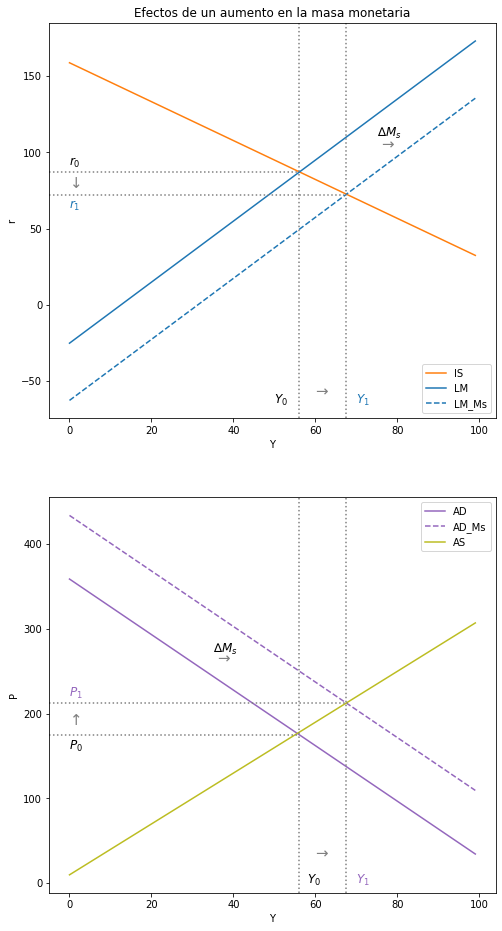

In [23]:
# IS-LM

#1--------------------------------------------------
    # Curva IS ORIGINAL

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#2--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 8           

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

#--------------------------------------------------
    # NUEVA curva LM: incremento en la Masa Monetaria (Ms)

# Definir SOLO el parámetro cambiado
Ms = 500

# Generar la ecuación con el nuevo parámetro
def i_LM_Ms( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_Ms = i_LM_Ms( k, j, Ms, P, Y)

#DA-OA

#1--------------------------
    # Demanda Agregada ORGINAL
    
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

k = 2
j = 1                
Ms = 200             
P  = 8  

Y = np.arange(Y_size)


# Ecuación

B0 = Co + Io + Go + Xo
B1 = 1 - (b-m)*(1-t)

def P_AD(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_AD = P_AD(h, Ms, j, B0, B1, k, Y)

#--------------------------------------------------
    # NUEVA Demanda Agregada

# Definir SOLO el parámetro cambiado

Ms = 275

# Generar la ecuación con el nuevo parámetro

def P_AD_Ms(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_Ms = P_AD_Ms(h, Ms, j, B0, B1, k, Y)


#2--------------------------
    # Oferta Agregada ORIGINAL
    
# Parámetros

Y_size = 100

Pe = 70
θ = 3
_Y = 20  

Y = np.arange(Y_size)

# Ecuación

def P_AS(Pe, _Y, Y, θ):
    P_AS = Pe + θ*(Y-_Y)
    return P_AS

P_AS = P_AS(Pe, _Y, Y, θ)

# Dos gráficos en un solo cuadro
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 16)) 

#---------------------------------
    # Gráfico 1: IS-LM
    
ax1.plot(Y, r, label = "IS", color = "C1") #IS
ax1.plot(Y, i, label="LM", color = "C0")  #LM
ax1.plot(Y, i_Ms, label="LM_Ms", color = "C0", linestyle ='dashed')  #LM

ax1.axvline(x=67.5,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax1.axvline(x=56,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax1.axhline(y=72,  xmin= 0, xmax= 0.66, linestyle = ":", color = "grey")
ax1.axhline(y=87,  xmin= 0, xmax= 0.56, linestyle = ":", color = "grey")

ax1.text(75, 110, '∆$M_s$', fontsize=12, color='black')
ax1.text(76, 102, '→', fontsize=15, color='grey')
ax1.text(60, -60, '→', fontsize=15, color='grey')
ax1.text(0, 77, '↓', fontsize=15, color='grey')
ax1.text(50, -65, '$Y_0$', fontsize=12, color='black')
ax1.text(70, -65, '$Y_1$', fontsize=12, color='C0')
ax1.text(0, 91, '$r_0$', fontsize=12, color='black')
ax1.text(0, 63, '$r_1$', fontsize=12, color='C0')


ax1.set(title="Efectos de un aumento en la masa monetaria", xlabel= r'Y', ylabel= r'r')
ax1.legend()


#---------------------------------
    # Gráfico 2: DA-OA

ax2.plot(Y, P_AD, label = "AD", color = "C4") #DA
ax2.plot(Y, P_Ms, label = "AD_Ms", color = "C4", linestyle = 'dashed') #DA_Ms
ax2.plot(Y, P_AS, label = "AS", color = "C8") #OA

ax2.axvline(x=67.5,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax2.axvline(x=56,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax2.axhline(y=213,  xmin= 0, xmax= 0.67, linestyle = ":", color = "grey")
ax2.axhline(y=175,  xmin= 0, xmax= 0.56, linestyle = ":", color = "grey")

ax2.text(60, 30, '→', fontsize=15, color='grey')
ax2.text(36, 260, '→', fontsize=15, color='grey')
ax2.text(35, 272, '∆$M_s$', fontsize=12, color='black')
ax2.text(0, 187, '↑', fontsize=15, color='grey')

ax2.text(58, 0, '$Y_0$', fontsize=12, color='black')
ax2.text(70, 0, '$Y_1$', fontsize=12, color='C4')
ax2.text(0, 158, '$P_0$', fontsize=12, color='black')
ax2.text(0, 220, '$P_1$', fontsize=12, color='C4')

ax2.set(xlabel= r'Y', ylabel= r'P')
ax2.legend()

plt.show